# EA MAP578 Gossip algorithms 

November 2023

# Overall questions:
1. We look at polynomials of W, but how do we pick W? "we are given W"
2. Spectral gap more important than absolut spectral gap? 
3. In practice, how do we know the dimension of the graph?
4. What happens if we apply the dimension algorithm with the wrong dimension?
5. Does a low dimension "$d$" kill the convergence even with jacobi? Probably yes

# Vocab
1. Relaxation time 
2. Spectral gap, spectral dim

# Key points:
1. Usually algorithms use the spectral gap $\gamma$, here we use the dimension $d$

##### "We argue that in most applications of gossip methods, the asymptotic rate of convergence is not relevant as there is noise in the initial data ξ, thus a high precision on the result would be useless. However, we also build a gossip iteration that uses both parameters d and γ and achieves both the efficiency in the non-transitive regime and the fast rate of convergence."

2. We look at the regime $t<\frac{1}{\sqrt{\gamma}}$

# 1. Simple Gossip with small matrix

## 1.1 How to plot a Graph from adjacency matrix

In [ ]:
import networkx as nx 
import numpy as np
from sympy import *
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors


The Mean of the weight is 30.0


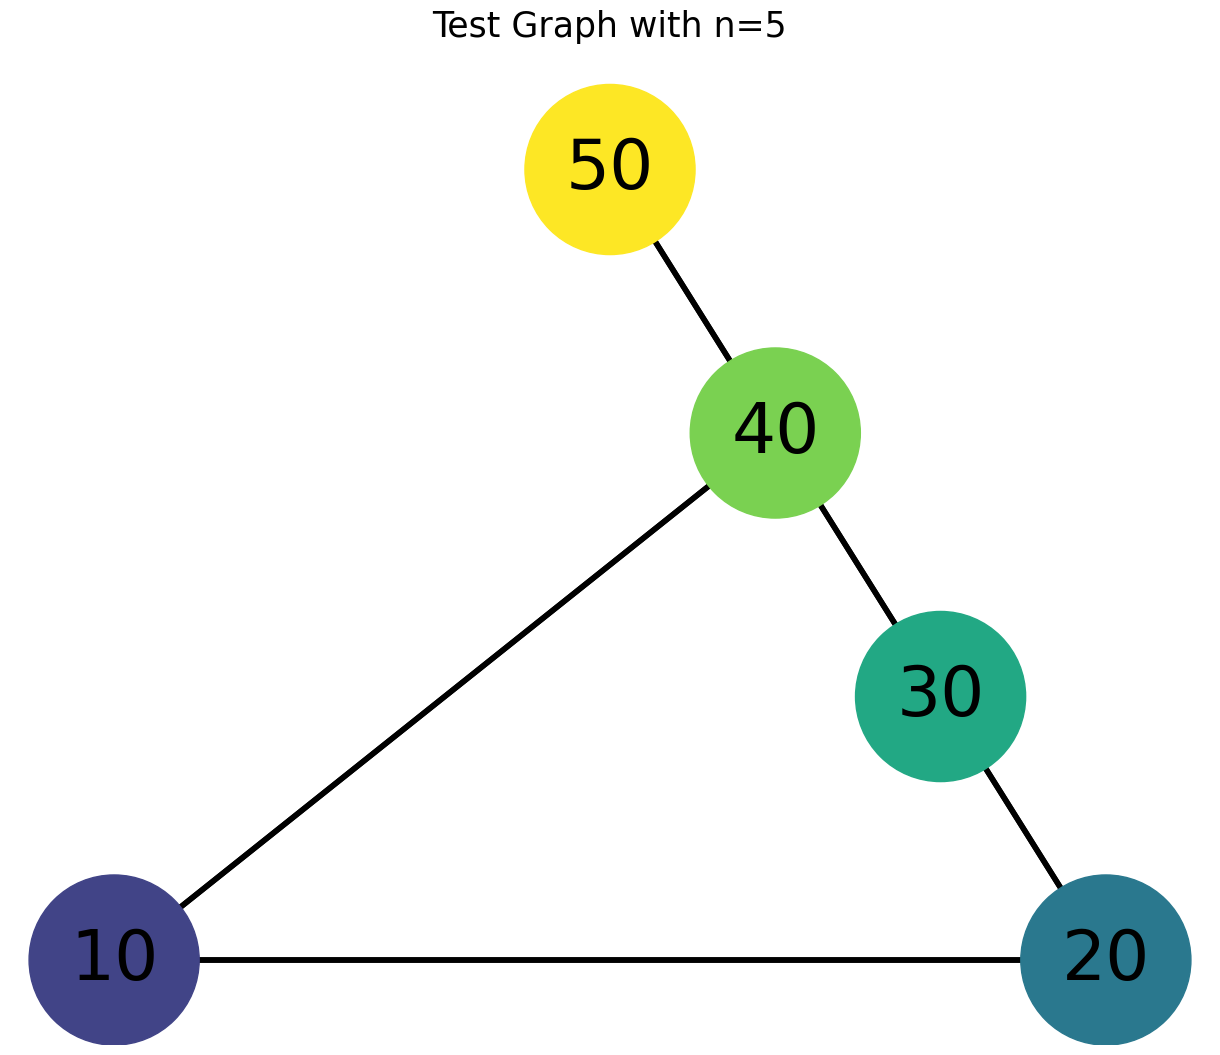

Matrix([
[1, 1, 0, 1, 0],
[1, 1, 1, 0, 0],
[0, 1, 1, 1, 0],
[1, 0, 1, 1, 1],
[0, 0, 0, 1, 1]])

In [ ]:
G = nx.DiGraph()
A=[[1,1,0,1,0],[1,1,1,0,0],[0,1,1,1,0],[1,0,1,1,1],[0,0,0,1,1]]
n=len(A)
weight=[10,20,30,40,50]
mean=np.mean(weight)
print("The Mean of the weight is "+str(mean))

rows,columns=np.shape(A)
labels=[0,1,2,5,4]

for i in range(rows): 
    G.add_node(i, weight=weight[i],label=labels[i])
    for j in range( columns): 
        if A[i][j] == 1: 
            G.add_edge(i,j)
# G.nodes.Name = {'First' 'Second' 'Third' 'Fourth'}

plt.figure(figsize=(12,10))
weights = {n: G.nodes[n]['weight'] for n in G.nodes}

node_weights = [G.nodes[n]['weight'] for n in G.nodes]
norm = mcolors.Normalize(vmin=np.min(0), vmax=np.max(node_weights))
    
# Créez un objet mappable pour mapper les valeurs à des couleurs
scalar_map = plt.cm.ScalarMappable(norm=norm, cmap="viridis")

# Obtenez les couleurs mappées pour chaque valeur de nœud au temps donné
colors = [scalar_map.to_rgba(value) for value in node_weights]

#colors = [G.nodes[n]['weight'] for n in G.nodes]

pos = nx.planar_layout(G)
nx.draw(G,pos,arrowstyle="-",with_labels=True, labels=weights, node_color=colors, label="test", node_size=15000, font_size=50,width=4)
plt.title(f"Test Graph with n=5", fontsize=25)
plt.show()
Matrix(A)

The Mean of the weight is 30.0


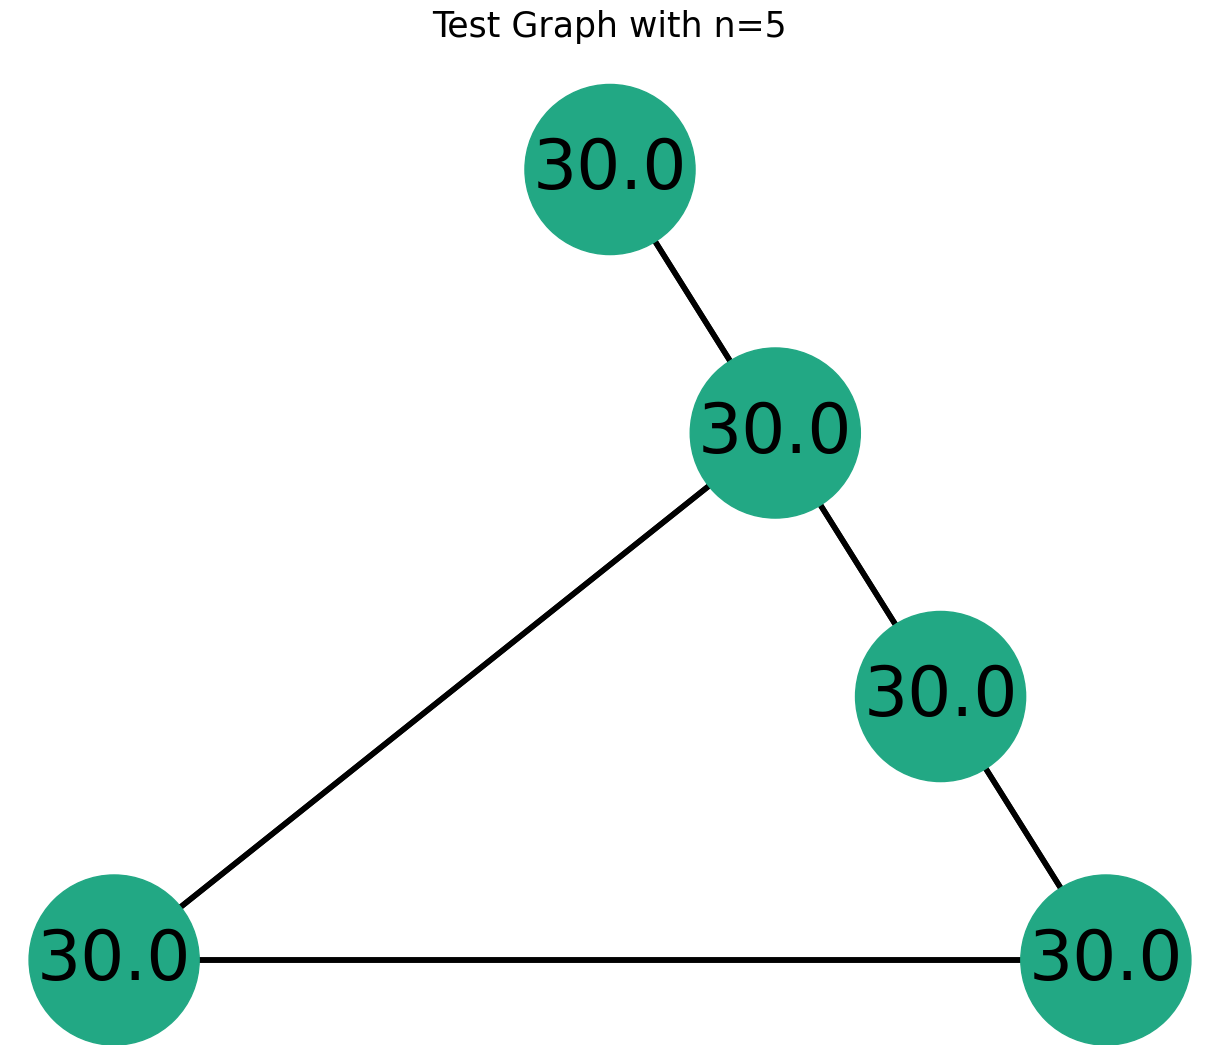

In [ ]:
G = nx.DiGraph()
A=[[1,1,0,1,0],[1,1,1,0,0],[0,1,1,1,0],[1,0,1,1,1],[0,0,0,1,1]]
n=len(A)
weight=[10,20,30,40,50]
mean=np.mean(weight)
print("The Mean of the weight is "+str(mean))



rows,columns=np.shape(A)
labels=[0,1,2,5,4]

for i in range(rows): 
    G.add_node(i, weight=mean,label=labels[i])
    for j in range( columns): 
        if A[i][j] == 1: 
            G.add_edge(i,j)
# G.nodes.Name = {'First' 'Second' 'Third' 'Fourth'}

plt.figure(figsize=(12,10))
weights = {n: G.nodes[n]['weight'] for n in G.nodes}

node_weights = [G.nodes[n]['weight'] for n in G.nodes]

colors = [scalar_map.to_rgba(value) for value in node_weights]
pos = nx.planar_layout(G)

nx.draw(G,pos,arrowstyle="-",with_labels=True, labels=weights, node_color=colors, label="test", node_size=15000, font_size=50,width=4)
plt.title(f"Test Graph with n=5", fontsize=25)
plt.show()


In [ ]:
# Generate a gossip matrix W for the given graph
def generate_gossip_matrix(A ):
    A = np.array(A)
    num_nodes = A.shape[0]
    W = np.eye(num_nodes)
    D = np.diagflat(np.sum(A,axis = 1))
    dmax = np.max(np.sum(A,axis = 1))

    W += (A-D)/dmax
    return W

The Mean of the weight is 30.0


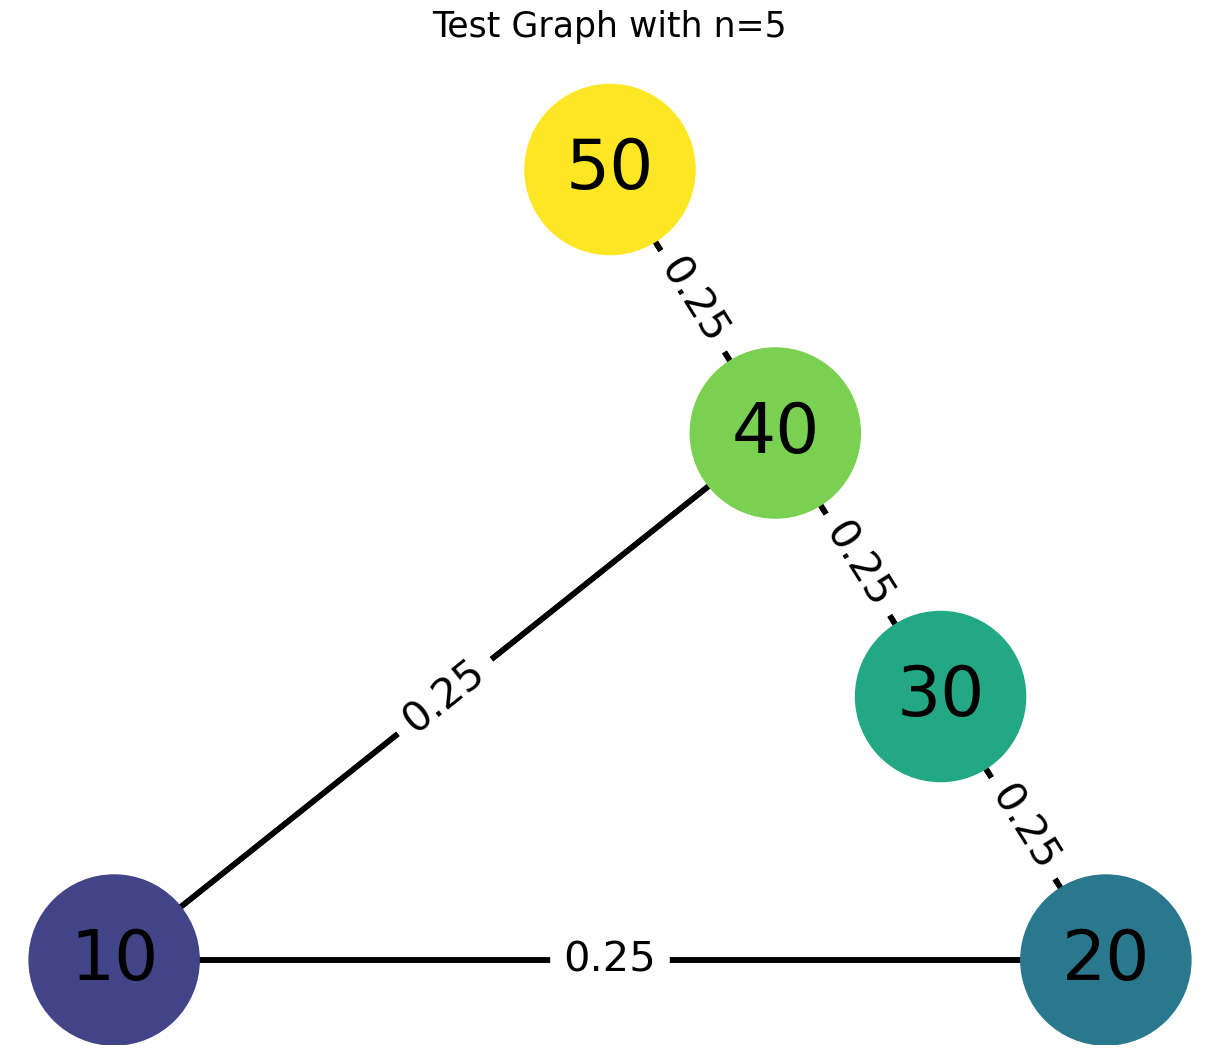

In [ ]:
G = nx.DiGraph()
A=[[1,1,0,1,0],[1,1,1,0,0],[0,1,1,1,0],[1,0,1,1,1],[0,0,0,1,1]]
n=len(A)
weight=[10,20,30,40,50]
mean=np.mean(weight)
print("The Mean of the weight is "+str(mean))

W = generate_gossip_matrix(A)

rows,columns=np.shape(A)
labels=[0,1,2,5,4]

for i in range(rows): 
    G.add_node(i, weight=weight[i],label=labels[i])
    for j in range( columns): 
        if A[i][j] == 1: 
            G.add_edge(i,j)
# G.nodes.Name = {'First' 'Second' 'Third' 'Fourth'}

plt.figure(figsize=(12,10))
weights = {n: G.nodes[n]['weight'] for n in G.nodes}

node_weights = [G.nodes[n]['weight'] for n in G.nodes]
norm = mcolors.Normalize(vmin=np.min(0), vmax=np.max(node_weights))
    
# Créez un objet mappable pour mapper les valeurs à des couleurs
scalar_map = plt.cm.ScalarMappable(norm=norm, cmap="viridis")

# Obtenez les couleurs mappées pour chaque valeur de nœud au temps donné
colors = [scalar_map.to_rgba(value) for value in node_weights]

#colors = [G.nodes[n]['weight'] for n in G.nodes]

pos = nx.planar_layout(G)
nx.draw(G,pos,arrowstyle="-",with_labels=True, labels=weights, node_color=colors, label="test", node_size=15000, font_size=50,width=4)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=dict([((n1, n2), W[n1,n2])
                    for n1, n2 in G.edges]),
    font_color='black',
    font_size = 30)
plt.title(f"Test Graph with n=5", fontsize=25)
plt.show()



## 1.2 Simple Gossip : compute W and observe convergence of error 

In [ ]:
v= #sum of coef on one line 
Degree = np.diag(v)
dmax=max(v)

print("degrees of the nodes are "+str(v))
print("maximum degree of the nodes is "+str(dmax))

W=np.diag(np.ones(n).astype('int'))+(A-Degree)/dmax
Matrix(W)

SyntaxError: invalid syntax (476965779.py, line 1)

In [ ]:
#Compute the evolution of the weights with Simple Gossip
Res=[np.dot(np.linalg.matrix_power(W,n),weight) for n in range(1,30)]
err=np.max(np.abs(Res-mean),1)
Matrix(Res)

In [ ]:
plt.figure(figsize=(14,8))
plt.xlabel("time",fontsize=15)
plt.grid()
x=plt.plot([err[0]*0.792**i for i in range(30)],label="powers of second largest eigenvalue",color="blue",alpha=0.3,linewidth=8)
x=plt.plot(err,label="Error with simple gossip", color="red")
plt.legend(fontsize=12)

##  1.3 Diagonalize the gossip matrix W to look at the eigenvalues

In [ ]:
# Use sympy.diagonalize() method  
P, D = Matrix(W).diagonalize()   
Matrix(W)

In [ ]:
D

#### Comment:
The eigen values will always be in $]-1,1[$. Lets order the eigen values by decreasing modulus. We have $\lambda_{1}=1$.  The error decreases like $\lambda_{2}^{t}$. 

# 2. Generate larger graphs

## 2.1 Randomly generated graph of size n and density of edges p (play with it)

In [ ]:
#generation of edges
def Adjacent(n,p,weight):
    A=np.diag(np.ones(n).astype('int'))
    A[0][1]=1
    A[1][0]=1
    for i in range(n):
        for j in range(i):
            x=np.random.random()
            if x<p:
                A[i][j]=1
                A[j][i]=1
        while np.sum(A[i])==1: #not connected to anyone
            j=np.random.randint(i+1)
            A[i][j]=1
            A[j][i]=1
    
    G = nx.DiGraph()
    for i in range(n): 
        G.add_node(i, weight=weight[i])
        for j in range(n): 
            if A[i][j] == 1: 
                G.add_edge(i,j)
    return A,G

In [ ]:
#parameters for graph generation
n=40 #number of nodes
p=0.001 #density of edges
weight=[10*i for i in range(n)] #initial weights for the nodes

A,G=Adjacent(n,p,weight)
mean=np.mean(weight)
print("The Mean of the weight is "+str(mean))

plt.figure(figsize=(18,15))
plt.title(f"Graph for number of nodes n={n} and density of edges p={p}", fontsize=17)
weights = {n: G.nodes[n]['weight'] for n in G.nodes}
colors = ["yellow" for n in G.nodes]#G.nodes[n]['weight']
nx.draw(G, with_labels=True, labels=weights, node_color=colors,label="Test")
plt.show()
# Matrix(A)

In [ ]:
#Compute the Gossip Matrix
v=np.dot(A,np.ones(n).astype('int')) 
Degree = np.diag(v)
dmax=max(v)
W=np.diag(np.ones(n).astype('int'))+(A-Degree)/dmax

#Find the second largest eigen value
P, D = Matrix(W).diagonalize()   
V=np.sort(np.real(np.sum(D,1)))
V=[V[len(V)-1-i] for i in range(len(V))]
print(V[0:])
print("the rate of convergence is the second highest eigenvalue in norm, so lambda="+str(V[1])[0:4])

#### Comment:
For high n and low p we get a lot of eigenvalues close to 1
Ex: for n=40 and p=0.001 we get the following values $[1.000, 0.997, 0.991, 0.980, 0.979, 0.974, 0.963, 0.950, 0.944, 0.929]$

## 2.2 Rate of convergence $\lambda_2$ as a function of density of edges $p$

In [ ]:
def Rate(n,p):
    weight=[10*i for i in range(n)] #initial weights for the nodes
    A,G=Adjacent(n,p,weight)
    #Compute the Gossip Matrix
    v=np.dot(A,np.ones(n).astype('int')) 
    Degree = np.diag(v)
    dmax=max(v)
    W=np.diag(np.ones(n).astype('int'))+(A-Degree)/dmax

    #Find the second largest eigen value
    P, D = Matrix(W).diagonalize()   
    V=np.sort(np.abs(np.sum(D,1)))
    return V[-2]

In [ ]:
#parameters for graph generation
n=20 #number of nodes
rate=[]
for i in range(1,20):
    p=0.05*i
    r=0
    for attempt in range(5):
        r+=Rate(n,p)
    rate.append(r/5)

In [ ]:
plt.figure(figsize=(12,8))
p=[0.05*i for i in range(1,20)]
plt.plot(p,rate,label="Second largest eigenvalue")
plt.legend(fontsize=12)
plt.xlabel("Density of edges", fontsize=12)

## 2.3 Attempt at estimating dimension d

### Dim 1

In [ ]:
#parameters for graph generation
n=40 #number of nodes
p=0.001 #density of edges
weight=[10*i for i in range(n)] #initial weights for the nodes

A,G=Adjacent(n,p,weight)
mean=np.mean(weight)
print("The Mean of the weight is "+str(mean))

plt.figure(figsize=(18,15))
plt.title(f"Graph for number of nodes n={n} and density of edges p={p}", fontsize=17)
weights = {n: G.nodes[n]['weight'] for n in G.nodes}
colors = ["yellow" for n in G.nodes]#G.nodes[n]['weight']
nx.draw(G, with_labels=True, labels=weights, node_color=colors,label="Test")
plt.show()
# Matrix(A)

In [ ]:
#Compute the Gossip Matrix
v=np.dot(A,np.ones(n).astype('int')) 
Degree = np.diag(v)
dmax=max(v)
W=np.diag(np.ones(n).astype('int'))+(A-Degree)/dmax

#Find the second largest eigen value
P, D = Matrix(W).diagonalize()   
V=np.sort(np.abs(np.sum(D,1)))
V=[V[len(V)-1-i] for i in range(len(V))]
print(V[0:20])
print("the rate of convergence is the second highest eigenvalue in norm, so lambda="+str(V[1])[0:4])

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(V,range(len(V)),label="density of eigenvalues")
plt.plot([0.01*a for a in range(0,101)],[40*(1-0.01*a)**0.5 for a in range(0,101)],label="model for d=1")
plt.legend(fontsize=15)

## Dim = 1

In [58]:
#parameters for graph generation
n=5 #number of nodes
weight=[10*i for i in range(n)] #initial weights for the nodes

G=nx.grid_graph(dim =(n,n,n), periodic = False)

mean=np.mean(weight)
print("The Mean of the weight is "+str(mean))

# Affichage du graphe avec les poids comme labels
#pos = dict((n, n) for n in G.nodes())
labels = {node: i+1 for i,node in enumerate(G.nodes())}

plt.figure(figsize=(10, 10))
#nx.draw(G, pos=pos, with_labels=False, labels=labels, font_size=20, node_size=2000, font_color='white')
nx.draw_cubic(G, with_labels=False, labels=labels, font_size=20, node_size=2000, font_color='white')

plt.title(f"Graphe pour n={n}", fontsize=15)
#plt.show()

The Mean of the weight is 20.0


AttributeError: module networkx has no attribute draw_cubic

<Figure size 1000x1000 with 0 Axes>

## Dim = 2

'\n# Calcul des positions pour les nœuds\npos = dict((node, node) for node in G.nodes())\n\n# Affichage du graphe en 3D\nfig = plt.figure(figsize=(10, 20))\nax = fig.add_subplot(111, projection=\'3d\')\nax.set_title(f"Graphe Cubique en 3D pour n={n}")\n\n# Dessin des arêtes\nfor edge in G.edges():\n    ax.plot([pos[edge[0]][0], pos[edge[1]][0]],\n            [pos[edge[0]][1], pos[edge[1]][1]],\n            [pos[edge[0]][2], pos[edge[1]][2]], color=\'black\')\n\n# Dessin des nœuds avec des poids comme labels et taille variable\nfor node in G.nodes():\n    ax.scatter(pos[node][0], pos[node][1], pos[node][2], color=\'royalblue\',s = 500, edgecolors=\'k\')\n\n# Supprimer les échelles\nax.set_axis_off()\n\nplt.show()\n'

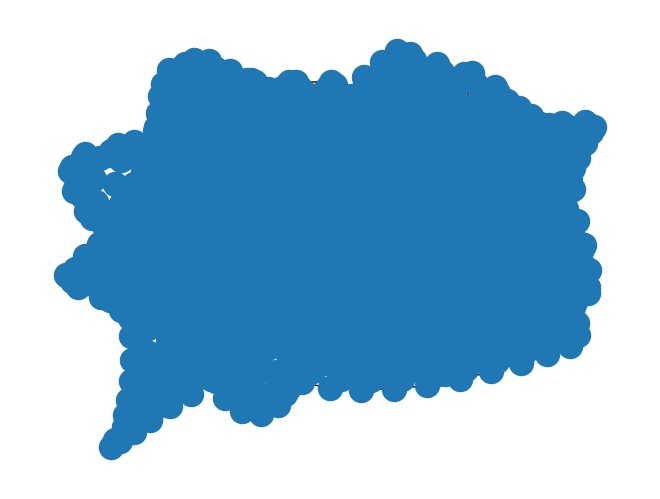

In [100]:
# Paramètres du graphe
n = 50 # Nombre de nœuds
weight = [10 * i for i in range(n)]  # Poids initial pour les nœuds

# Création du graphe NetworkX
G = nx.grid_graph(dim=(n,n), periodic=False)
nx.draw(G)
"""
# Calcul des positions pour les nœuds
pos = dict((node, node) for node in G.nodes())

# Affichage du graphe en 3D
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(111, projection='3d')
ax.set_title(f"Graphe Cubique en 3D pour n={n}")

# Dessin des arêtes
for edge in G.edges():
    ax.plot([pos[edge[0]][0], pos[edge[1]][0]],
            [pos[edge[0]][1], pos[edge[1]][1]],
            [pos[edge[0]][2], pos[edge[1]][2]], color='black')

# Dessin des nœuds avec des poids comme labels et taille variable
for node in G.nodes():
    ax.scatter(pos[node][0], pos[node][1], pos[node][2], color='royalblue',s = 500, edgecolors='k')

# Supprimer les échelles
ax.set_axis_off()

plt.show()
"""

In [ ]:
#Compute the Gossip Matrix
A = nx.adjacency_matrix(G).toarray()
v=np.dot(A,np.ones((n*n)).astype('int')) 
Degree = np.diag(v)
dmax=max(v)
W=np.diag(np.ones((n*n)).astype('int'))+(A-Degree)/dmax

#Find the second largest eigen value
P, D = Matrix(W).diagonalize()   
V=np.sort(np.abs(np.sum(D,1)))
V=[V[len(V)-1-i] for i in range(len(V))]
print(V[0:20])
print("the rate of convergence is the second highest eigenvalue in norm, so lambda="+str(V[1])[0:4])

/tmp/ipykernel_185/1887287217.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).toarray()


In [ ]:
plt.figure(figsize=(14,8))
plt.plot(V,range(len(V)),label="Density of eigenvalues")
plt.plot([0.01*a for a in range(0,101)],[n*(1-0.01*a) for a in range(0,101)],label="Model for d=1")
plt.legend(fontsize=15)

## Dim = 3

'\n# Calcul des positions pour les nœuds\npos = dict((node, node) for node in G.nodes())\n\n# Affichage du graphe en 3D\nfig = plt.figure(figsize=(10, 20))\nax = fig.add_subplot(111, projection=\'3d\')\nax.set_title(f"Graphe Cubique en 3D pour n={n}")\n\n# Dessin des arêtes\nfor edge in G.edges():\n    ax.plot([pos[edge[0]][0], pos[edge[1]][0]],\n            [pos[edge[0]][1], pos[edge[1]][1]],\n            [pos[edge[0]][2], pos[edge[1]][2]], color=\'black\')\n\n# Dessin des nœuds avec des poids comme labels et taille variable\nfor node in G.nodes():\n    ax.scatter(pos[node][0], pos[node][1], pos[node][2], color=\'royalblue\',s = 500, edgecolors=\'k\')\n\n# Supprimer les échelles\nax.set_axis_off()\n\nplt.show()\n'

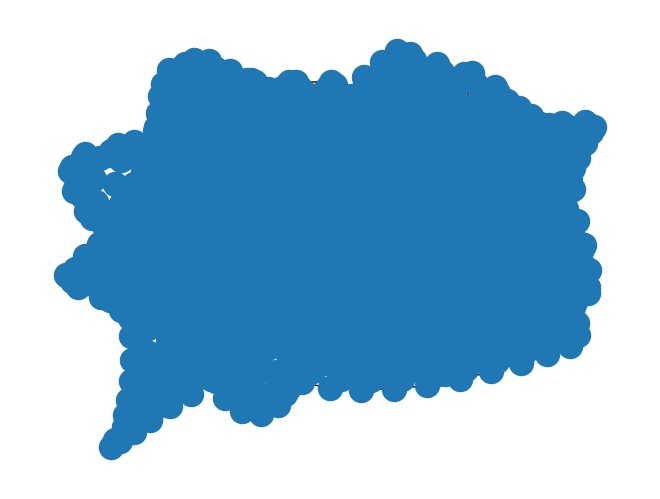

In [100]:
# Paramètres du graphe
n = 20 # Nombre de nœuds
weight = [10 * i for i in range(n)]  # Poids initial pour les nœuds

# Création du graphe NetworkX
G = nx.grid_graph(dim=(n,n,n), periodic=False)
nx.draw(G)
"""
# Calcul des positions pour les nœuds
pos = dict((node, node) for node in G.nodes())

# Affichage du graphe en 3D
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(111, projection='3d')
ax.set_title(f"Graphe Cubique en 3D pour n={n}")

# Dessin des arêtes
for edge in G.edges():
    ax.plot([pos[edge[0]][0], pos[edge[1]][0]],
            [pos[edge[0]][1], pos[edge[1]][1]],
            [pos[edge[0]][2], pos[edge[1]][2]], color='black')

# Dessin des nœuds avec des poids comme labels et taille variable
for node in G.nodes():
    ax.scatter(pos[node][0], pos[node][1], pos[node][2], color='royalblue',s = 500, edgecolors='k')

# Supprimer les échelles
ax.set_axis_off()

plt.show()
"""

In [ ]:
#Compute the Gossip Matrix
A = nx.adjacency_matrix(G).toarray()
v=np.dot(A,np.ones((n*n*n)).astype('int')) 
Degree = np.diag(v)
dmax=max(v)
W=np.diag(np.ones((n*n*n)).astype('int'))+(A-Degree)/dmax

#Find the second largest eigen value
P, D = Matrix(W).diagonalize()   
V=np.sort(np.abs(np.sum(D,1)))
V=[V[len(V)-1-i] for i in range(len(V))]
print(V[0:20])
print("the rate of convergence is the second highest eigenvalue in norm, so lambda="+str(V[1])[0:4])

/tmp/ipykernel_185/1887287217.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).toarray()


In [ ]:
plt.figure(figsize=(14,8))
plt.plot(V,range(len(V)),label="Density of eigenvalues")
plt.plot([0.01*a for a in range(0,101)],[n*(1-0.01*a)**(3/2) for a in range(0,101)],label="Model for d=1")
plt.legend(fontsize=15)

### Dim 2

In [ ]:
#parameters for graph generation
n=40 #number of nodes
p=0.1 #density of edges
weight=[10*i for i in range(n)] #initial weights for the nodes

A,G=Adjacent(n,p,weight)
mean=np.mean(weight)
print("The Mean of the weight is "+str(mean))

plt.figure(figsize=(18,15))
plt.title(f"Graph for number of nodes n={n} and density of edges p={p}", fontsize=17)
weights = {n: G.nodes[n]['weight'] for n in G.nodes}
colors = ["yellow" for n in G.nodes]#G.nodes[n]['weight']
nx.draw(G, with_labels=True, labels=weights, node_color=colors,label="Test")
plt.show()
# Matrix(A)

In [ ]:
#Compute the Gossip Matrix
v=np.dot(A,np.ones(n).astype('int')) 
Degree = np.diag(v)
dmax=max(v)
W=np.diag(np.ones(n).astype('int'))+(A-Degree)/dmax

#Find the second largest eigen value
P, D = Matrix(W).diagonalize()   
V=np.sort(np.abs(np.sum(D,1)))
V=[V[len(V)-1-i] for i in range(len(V))]
print(V[0:20])
print("the rate of convergence is the second highest eigenvalue in norm, so lambda="+str(V[1])[0:4])

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(V,range(len(V)),label="density of eigenvalues")
plt.plot([0.01*a for a in range(0,101)],[40*(1-0.01*a)**(2/2) for a in range(0,101)],label="model for d=1")
plt.legend(fontsize=15)

### Dim 3 

In [ ]:
#parameters for graph generation
n=40 #number of nodes
p=0.2 #density of edges
weight=[10*i for i in range(n)] #initial weights for the nodes

A,G=Adjacent(n,p,weight)
mean=np.mean(weight)
print("The Mean of the weight is "+str(mean))

plt.figure(figsize=(18,15))
plt.title(f"Graph for number of nodes n={n} and density of edges p={p}", fontsize=17)
weights = {n: G.nodes[n]['weight'] for n in G.nodes}
colors = ["yellow" for n in G.nodes]#G.nodes[n]['weight']
nx.draw(G, with_labels=True, labels=weights, node_color=colors,label="Test")
plt.show()
# Matrix(A)

In [ ]:
#Compute the Gossip Matrix
v=np.dot(A,np.ones(n).astype('int')) 
Degree = np.diag(v)
dmax=max(v)
W=np.diag(np.ones(n).astype('int'))+(A-Degree)/dmax

#Find the second largest eigen value
P, D = Matrix(W).diagonalize()   
V=np.sort(np.abs(np.sum(D,1)))
V=[V[len(V)-1-i] for i in range(len(V))]
print(V[0:20])
print("the rate of convergence is the second highest eigenvalue in norm, so lambda="+str(V[1])[0:4])

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(V,range(len(V)),label="density of eigenvalues")
plt.plot([0.01*a for a in range(0,101)],[40*(1-0.01*a)**(3/2) for a in range(0,101)],label="model for d=3")
plt.legend(fontsize=15)

#### Comment :
The graph doesnt really make sense because we should zoom around 1. Except around 1 we have no eigenvalues...

$\xi_n=\Omega \begin{pmatrix} P_n(\lambda_1) & & & &  \\ & .& &(0) & \\ & & .& & \\ &(0) & & .& \\  & & & & P_n(\lambda_k) \end{pmatrix}\Omega^T\xi_0$